In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.core import datetools
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import quandl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


/Users/zuba818/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
df = pd.read_excel("/Users/zuba818/Downloads/Stock_Data/stock-all.xls", sheet_name='stock')

In [58]:
df_stock_1 = df[df.stock_id == 1].copy()
df_stock_11 = df[df.stock_id == 11].copy()
df_stock_13 = df[df.stock_id == 13].copy()
df_stock_23 = df[df.stock_id == 23].copy()
df_stock_293 = df[df.stock_id == 293].copy()
df_stock_1.head()

,stock_id,tdate,open,close,high,low,volume
0,1,2000-01-04,100.0,98.00,101.0,98.00,2283100
1,1,2000-01-05,93.5,91.25,95.0,90.75,4330100
2,1,2000-01-06,92.0,86.75,92.5,85.00,7462000
3,1,2000-01-07,88.0,88.50,89.0,86.50,4323800
4,1,2000-01-10,91.5,89.25,93.0,89.25,3713200


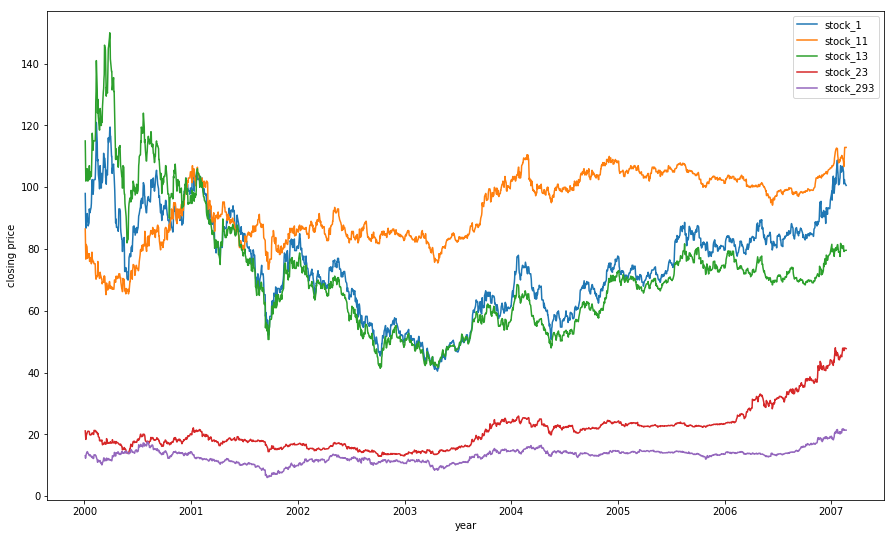

In [13]:
plt.plot(df_stock_1.tdate, df_stock_1.close,label = 'stock_1')
plt.plot(df_stock_11.tdate, df_stock_11.close,label = 'stock_11')
plt.plot(df_stock_13.tdate, df_stock_13.close,label = 'stock_13')
plt.plot(df_stock_23.tdate, df_stock_23.close,label = 'stock_23')
plt.plot(df_stock_293.tdate, df_stock_293.close,label = 'stock_293')
plt.xlabel("year")
plt.ylabel("closing price")
plt.legend(loc='upper right')

In [14]:
df.describe()

,stock_id,open,close,high,low,volume
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,1.106800e+04
mean,195.628117,46.638477,46.623703,47.052904,46.183871,2.094519e+07
std,308.090381,36.508613,36.492517,36.817295,36.174758,6.183043e+07
min,1.000000,1.110000,1.110000,1.160000,1.100000,0.000000e+00
25%,11.000000,13.587500,13.550000,13.650000,13.450000,2.379075e+06
50%,13.000000,44.000000,43.900000,44.400000,43.425000,4.636750e+06
75%,293.000000,80.750000,80.750000,81.500000,80.000000,9.231050e+06
max,857.000000,150.000000,150.000000,153.500000,149.000000,4.117606e+09


In [59]:
ss1 = pd.concat([df_stock_1.tdate,df_stock_1.close],axis=1)
ss2 = ss1.set_index('tdate')

In [16]:
X = ss1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
ss1pred = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    ss1pred.append('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


/Users/zuba818/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/zuba818/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/zuba818/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Test MSE: 1.097


In [17]:
ss1pred

['predicted=68.021342, expected=68.750000',
 'predicted=68.763167, expected=69.000000',
 'predicted=68.984658, expected=68.500000',
 'predicted=68.491673, expected=69.500000',
 'predicted=69.566842, expected=69.250000',
 'predicted=69.183151, expected=68.750000',
 'predicted=68.613265, expected=69.000000',
 'predicted=69.079944, expected=69.250000',
 'predicted=69.206661, expected=68.500000',
 'predicted=68.383819, expected=66.500000',
 'predicted=66.306486, expected=66.000000',
 'predicted=65.963174, expected=65.500000',
 'predicted=65.450528, expected=65.500000',
 'predicted=65.452338, expected=67.000000',
 'predicted=67.226579, expected=67.000000',
 'predicted=66.969146, expected=68.500000',
 'predicted=68.605223, expected=68.500000',
 'predicted=68.524636, expected=68.000000',
 'predicted=67.800521, expected=67.750000',
 'predicted=67.763503, expected=67.000000',
 'predicted=66.842134, expected=67.000000',
 'predicted=66.970768, expected=67.250000',
 'predicted=67.292042, expected=

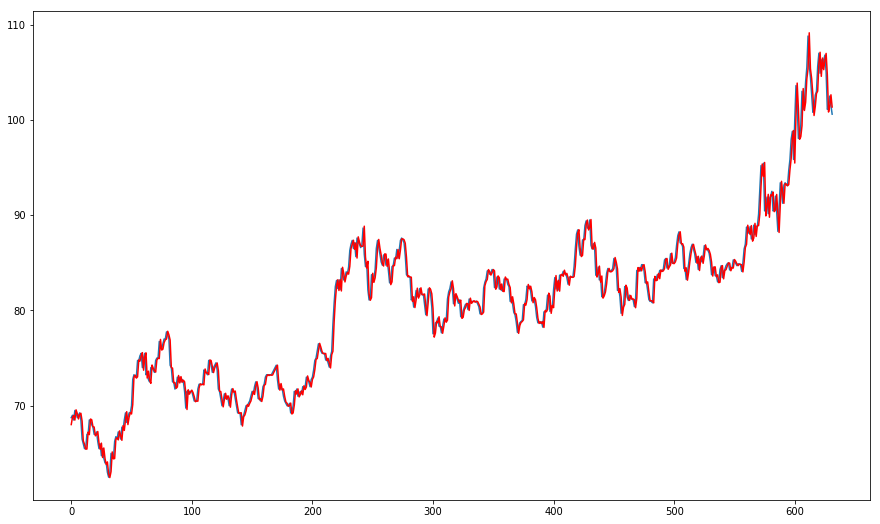

In [18]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')

In [72]:
test = ss1[['close']]
forecast_out = int(30)
df['Prediction'] = test[['close']].shift(-forecast_out)
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [61]:
forecast_out = int(30)
df['Prediction'] = test[['close']].shift(-forecast_out)
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [51]:
y = np.array(df[Prediction])
y = y[:-forecast_out]


NameError: name 'Prediction' is not defined